In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('C:/Users/USER/Desktop/kaggle/train_ti.csv')
df_test = pd.read_csv('C:/Users/USER/Desktop/kaggle/test.csv')


In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value{:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value0.00%
column:   Survived	 Percent of NaN value0.00%
column:     Pclass	 Percent of NaN value0.00%
column:       Name	 Percent of NaN value0.00%
column:        Sex	 Percent of NaN value0.00%
column:        Age	 Percent of NaN value19.87%
column:      SibSp	 Percent of NaN value0.00%
column:      Parch	 Percent of NaN value0.00%
column:     Ticket	 Percent of NaN value0.00%
column:       Fare	 Percent of NaN value0.00%
column:      Cabin	 Percent of NaN value77.10%
column:   Embarked	 Percent of NaN value0.22%


In [12]:
for col in df_test.columns:
    msg = 'column:{:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)                                                                 

column:PassengerId	 Percent of NaN value: 0.00%
column:    Pclass	 Percent of NaN value: 0.00%
column:      Name	 Percent of NaN value: 0.00%
column:       Sex	 Percent of NaN value: 0.00%
column:       Age	 Percent of NaN value: 9.65%
column:     SibSp	 Percent of NaN value: 0.00%
column:     Parch	 Percent of NaN value: 0.00%
column:    Ticket	 Percent of NaN value: 0.00%
column:      Fare	 Percent of NaN value: 0.11%
column:     Cabin	 Percent of NaN value: 36.70%
column:  Embarked	 Percent of NaN value: 0.00%


##Target label 확인

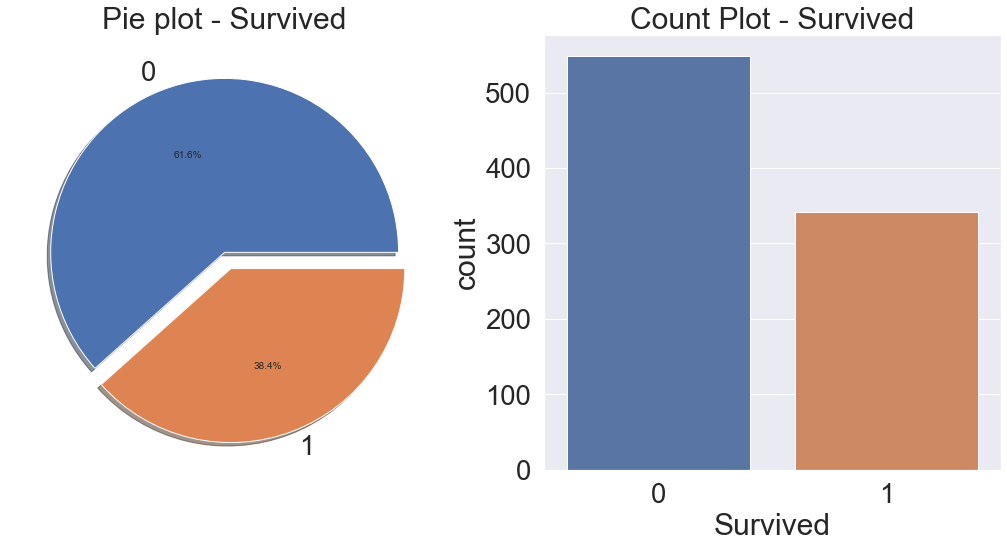

In [13]:
f,ax= plt.subplots(1,2,figsize =(18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow =True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count Plot - Survived')
plt.show()


In [14]:
# Pclass
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],margins =True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [19]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],margins = True).style.background_gradient(cmap ='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


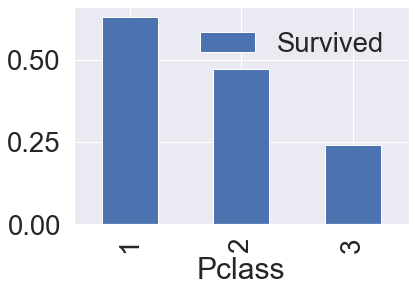

In [20]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).mean().sort_values(by = 'Survived',ascending =False).plot.bar()

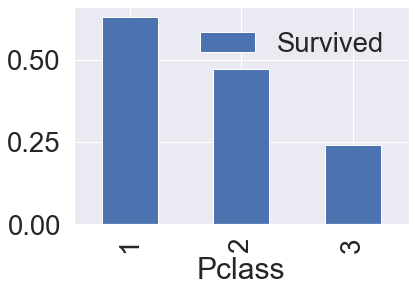

In [21]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).mean().sort_values(by = 'Survived',ascending =False).plot.bar()

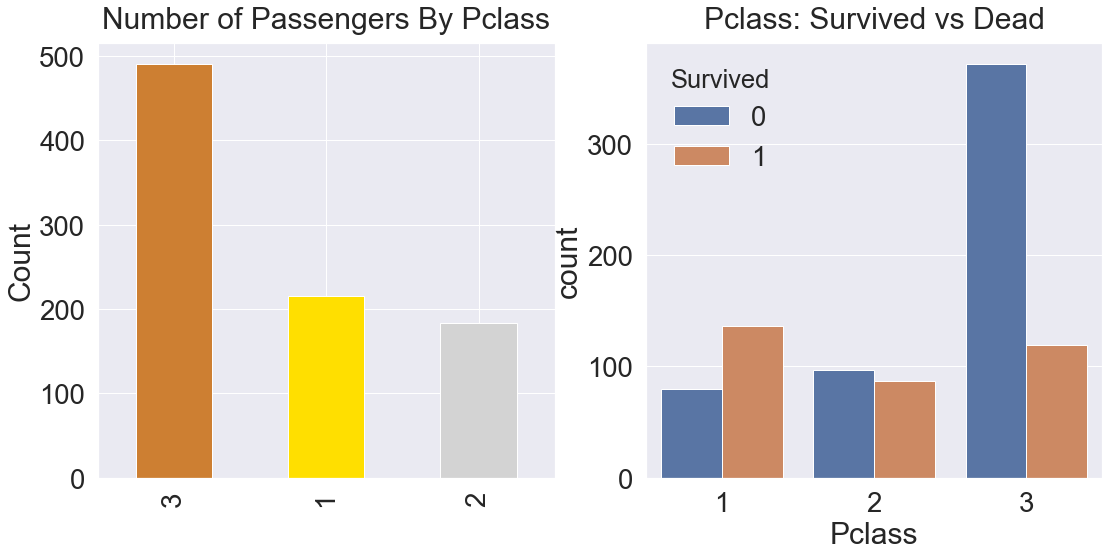

In [27]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'],ax =ax[0])
ax[0].set_title('Number of Passengers By Pclass', y =y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue = 'Survived',data = df_train,ax =ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

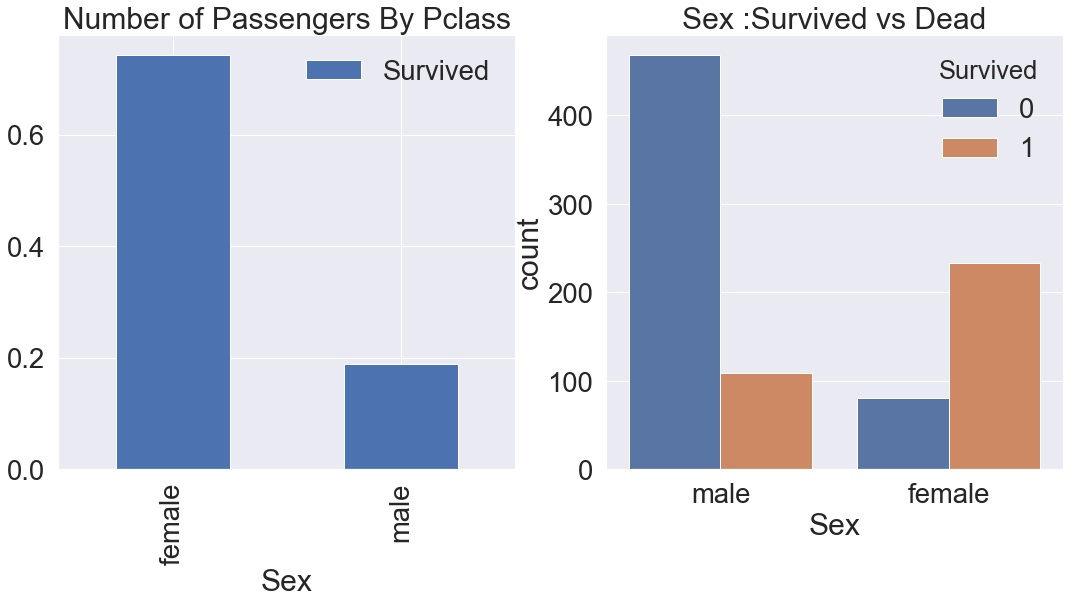

In [29]:
#2.2 Sex
f, ax = plt.subplots(1,2,figsize =(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
sns.countplot('Sex',hue ='Survived',data = df_train, ax =ax[1])
ax[1].set_title('Sex :Survived vs Dead')
plt.show()

In [30]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index =True).sum()

,Survived
Sex,
female,233
male,109


In [33]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


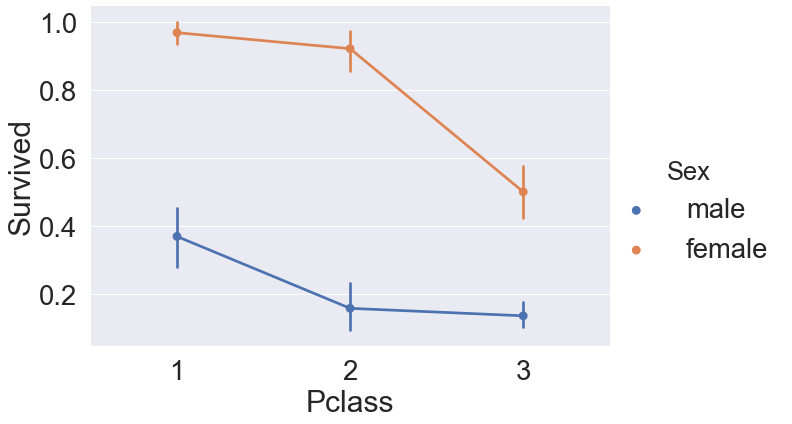

In [34]:
##2.3 Both Sex and Pclass 
sns.factorplot('Pclass','Survived',hue ='Sex',data =df_train,size =6,aspect = 1.5)

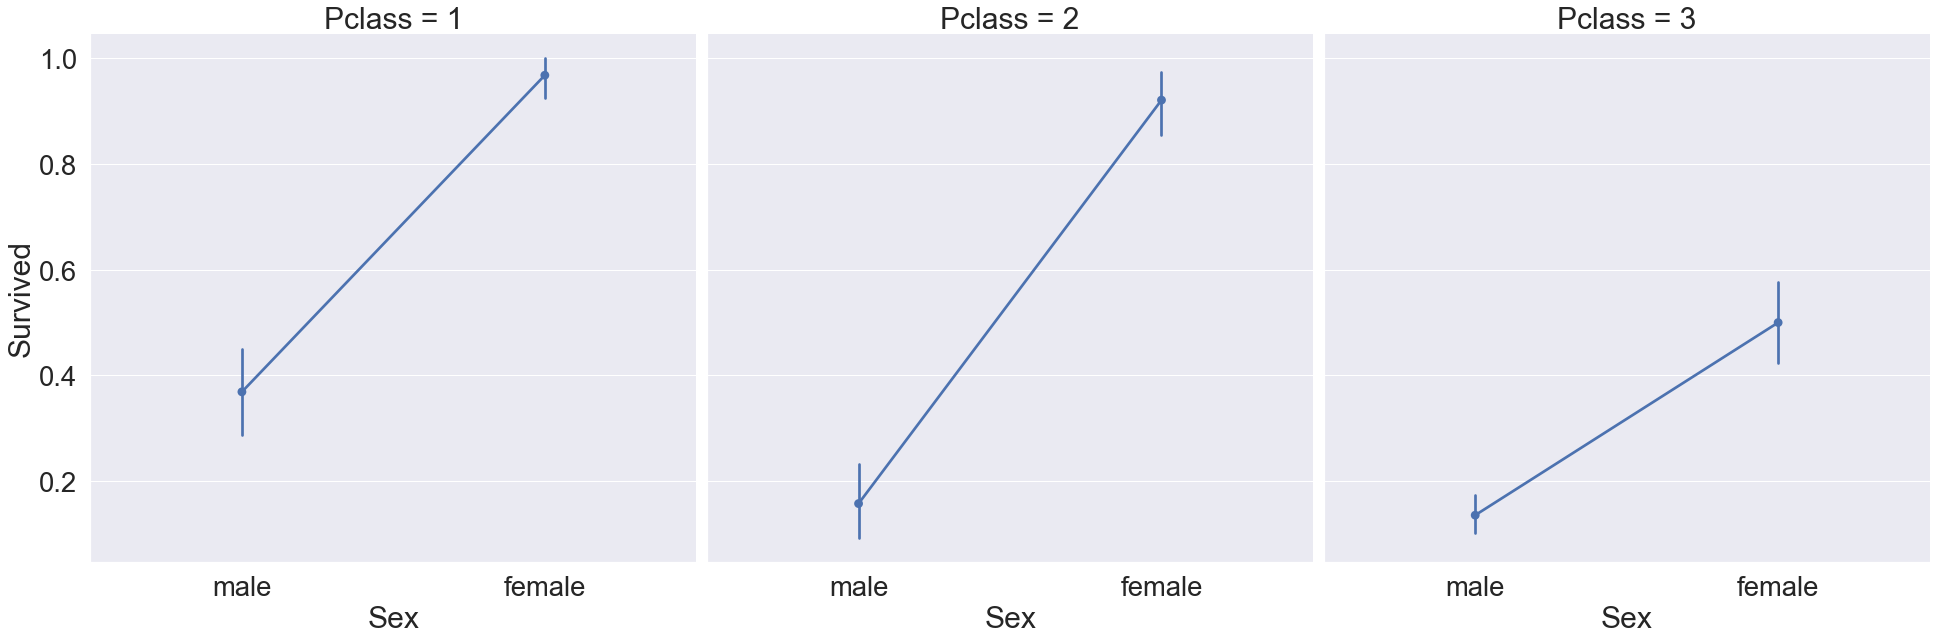

In [35]:
sns.factorplot(x= 'Sex',y='Survived', col='Pclass',
              data = df_train, satureation = .5,
              size = 9, aspect =1)

In [38]:
## 2.4 Age
# 제일 아니 많은 탑승객, 제일 어린 탑승객, 탑승객 평균나이 
print('제일 나이 많은 탑승객:{:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객:{:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균나이:{:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객:80.0 Years
제일 나이 어린 탑승객:0.4 Years
탑승객 평균나이:29.7 Years


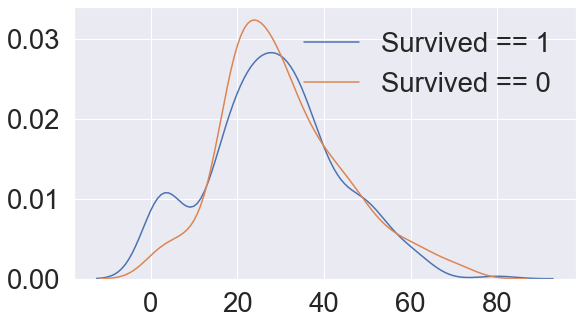

In [39]:
fig, ax = plt.subplots(1,1,figsize =(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

In [40]:
## 3 Feature engineering 
## 3.1 Fill Null
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [43]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [44]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [45]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


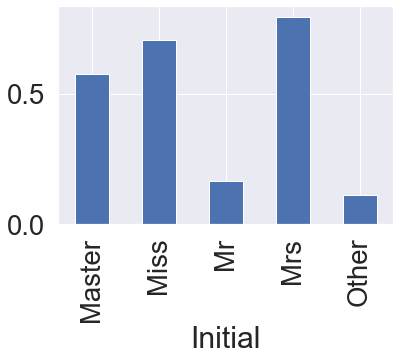

In [46]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [47]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


In [48]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [49]:
##Fill Null Embarked 

print('Embarked has', sum(df_train['Embarked'].isnull()),'Null values')

Embarked has 2 Null values


In [51]:
df_train['Embarked'].fillna('S', inplace=True)

In [53]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) &(df_train['Age']<20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) &(df_train['Age']<30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) &(df_train['Age']<40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) &(df_train['Age']<50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) &(df_train['Age']<60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) &(df_train['Age']<70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']) , 'Age_cat'] = 7
df_test['Age_cat'] = 0
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) &(df_test['Age']<20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) &(df_test['Age']<30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) &(df_test['Age']<40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) &(df_test['Age']<50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) &(df_test['Age']<60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) &(df_test['Age']<70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']) , 'Age_cat'] = 7



함수 사용방법

In [61]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else: 
        return 7

df_train['Age_cat_2'] =df_train['Age'].apply(category_age)

In [62]:

print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True  True


In [63]:
df_train.drop(['Age','Age_cat_2'],axis=1, inplace =True)
df_test.drop(['Age'],axis =1, inplace =True)

In [65]:
## 3.3 변경 
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1,'Mr':2, 'Mrs':3,'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3, 'Other':4})

In [66]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [67]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [73]:
df_train['Embarked'].isnull().any()

False

In [75]:
df_train['Sex'] =df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] =df_test['Sex'].map({'female':0,'male':1})

In [76]:
def corr_heatmap(var):
    correlations = df_train[var].corr()
    
    cmap = sns.diverging_palette(50,10,as_camp = True)
    fig, ax = plt.subplots(figsize = (10,10))
    sns.heatmap(correlations, cmap = cmap, vmax = 1.0,center =0, fmt ='.2f',
               square =True, linewiths =0.5, annot = True, cbar_kws = {'shrink':0.75})
    plt.show()

    
    
    
    
    
    

In [79]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

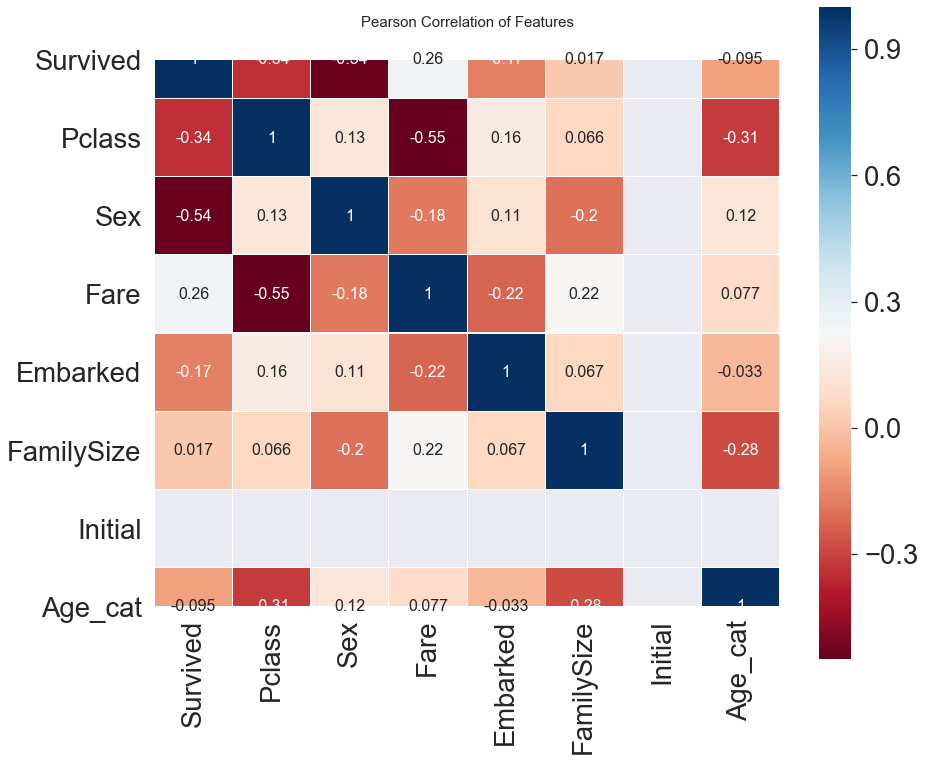

In [80]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize= (14,12))
plt.title('Pearson Correlation of Features', y= 1.05,size =15)
sns.heatmap(heatmap_data.astype(float).corr(),linewidths = 0.1,vmax = 1.0,
            square = True,cmap = colormap, linecolor ='white', annot = True, annot_kws = {'size':16})
del heatmap_data

In [78]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,2,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,0,NaN,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,2,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,2,NaN,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,2,NaN,3


In [81]:
## 3.4 One-hot encoding 
df_train = pd.get_dummies(df_train,columns = ['Initial'],prefix = 'Initial')
df_test = pd.get_dummies(df_test,columns = ['Initial'],prefix ='Initial')

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,0,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,2,3,2
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,2,3,1


In [83]:
df_train = pd.get_dummies(df_train,columns = ['Embarked'],prefix = 'Embarked')
df_test = pd.get_dummies(df_test,columns = ['Embarked'], prefix = 'Embarked')

In [89]:
##Dropcolumns
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis =1,inplace = True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis =1, inplace =True)

In [120]:
df_test.drop(['Initial_0','Initial_1','Initial_2','Initial_3','Initial_4'],axis =1, inplace =True)

In [121]:
df_test.head()

,Pclass,Sex,Fare,Age_cat,FamilySize,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,3,1,0,1,0
1,3,0,7.0000,4,2,0,0,1
2,2,1,9.6875,6,1,0,1,0
3,3,1,8.6625,2,1,0,0,1
4,3,0,12.2875,2,3,0,0,1


In [122]:
## 4 model 구축

from sklearn.ensemble import RandomForestClassifier ## 
from sklearn import metrics  ## 모델의 평가 위한 사전 단계
from sklearn.model_selection import train_test_split ## 쉽게 나뉘주는 함수

In [123]:
# 4.1 준비 train, valid , test set 구분 
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [124]:
X_tr,X_val,y_tr, y_val = train_test_split(X_train,target_label,test_size = 0.3, random_state = 2018)

In [125]:
##Model PREDICTION
model = RandomForestClassifier()
model.fit(X_tr,y_tr)
prediction = model.predict(X_val)

In [126]:
print('총 {}명 중{:.2f}% 정확도로 생존을 맞춤'.format(y_val.shape[0],100*metrics.accuracy_score(prediction,y_val)))

총 268명 중83.21% 정확도로 생존을 맞춤


In [127]:
##4.3 Feature importance
from pandas import Series
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

<function matplotlib.pyplot.show(*args, **kw)>

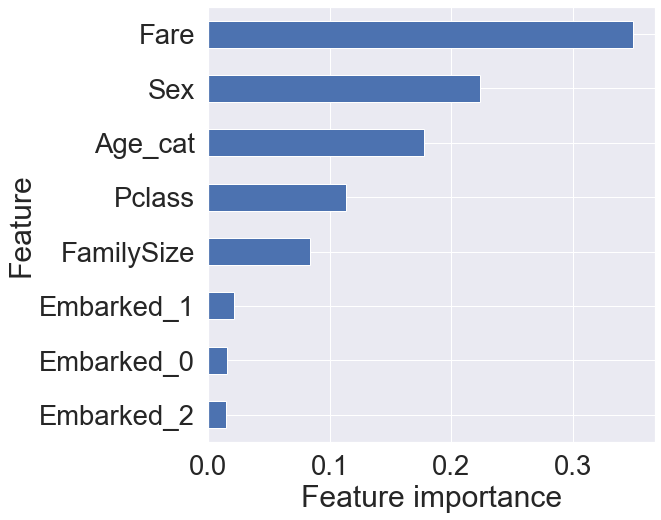

In [129]:
plt.figure(figsize =(8,8))
Series_feat_imp.sort_values(ascending =True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show

In [133]:
## 4.4 test set 예측
X_test

array([[ 3.    ,  1.    ,  7.8292, ...,  0.    ,  1.    ,  0.    ],
       [ 3.    ,  0.    ,  7.    , ...,  0.    ,  0.    ,  1.    ],
       [ 2.    ,  1.    ,  9.6875, ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 3.    ,  1.    ,  7.25  , ...,  0.    ,  0.    ,  1.    ],
       [ 3.    ,  1.    ,  8.05  , ...,  0.    ,  0.    ,  1.    ],
       [ 3.    ,  1.    , 22.3583, ...,  1.    ,  0.    ,  0.    ]])

In [131]:
submssion =pd.read_csv('C:/Users/USER/Desktop/kaggle/gender_submission.csv')

FileNotFoundError: [Errno 2] File b'C:/Users/USER/Desktop/kaggle/gender_submission.csv' does not exist: b'C:/Users/USER/Desktop/kaggle/gender_submission.csv'

In [105]:
submission.head()

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Age_cat', 'FamilySize',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [137]:
predict1 = model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [112]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,3.0,1.0,7.2500,2.0,2.0,0.0,0.0,1.0
1,1.0,0.0,71.2833,3.0,2.0,1.0,0.0,0.0
2,3.0,0.0,7.9250,2.0,1.0,0.0,0.0,1.0
3,1.0,0.0,53.1000,3.0,2.0,0.0,0.0,1.0
4,3.0,1.0,8.0500,3.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,2.0,1.0,13.0000,2.0,1.0,0.0,0.0,1.0
887,1.0,0.0,30.0000,1.0,1.0,0.0,0.0,1.0
888,3.0,0.0,23.4500,2.0,4.0,0.0,0.0,1.0
889,1.0,1.0,30.0000,2.0,1.0,1.0,0.0,0.0


df_test.shape()

In [140]:
df_test.isnull().count()

Pclass        418
Sex           418
Fare          418
Age_cat       418
FamilySize    418
Embarked_0    418
Embarked_1    418
Embarked_2    418
dtype: int64

In [141]:
df_test.shape

(418, 8)

In [116]:
for feature in df_test.columns:
    missings = df_test[df_test[feature].isnull]

Index(['Pclass', 'Sex', 'Fare', 'Age_cat', 'FamilySize', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [ ]:
vars_with_missing = []

for feature in trainset.columns:
    missings = trainset[trainset[feature] == -1][feature].count()   ## 결측값 수 파악 
    if missings > 0:              
        vars_with_missing.append(feature)
        missings_perc = missings/trainset.shape[0]   ## 비율 계산  결측값 수 / 전체 행
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(feature, missings, missings_perc))
        
        print('In total, there are {} vriables with missing values'.format(len(vars_with_missing)))